<a href="https://colab.research.google.com/github/JoseReveco/MinorMachineLearning/blob/main/Tarea_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org/)

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

1) (1 punto) Establecer una visualización de los datos a través de un [Gráfico de dispersión](https://seaborn.pydata.org/tutorial/axis_grids.html)

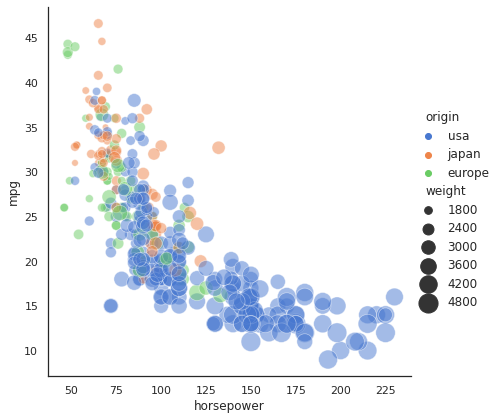

In [12]:
import seaborn as sns
sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)



In [ ]:
plt.scatter(mpg['mpg'], mpg['acceleration'], color='b')
# mpg vs acceleration
plt.xlabel('MPG')
plt.ylabel('Acceleration')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


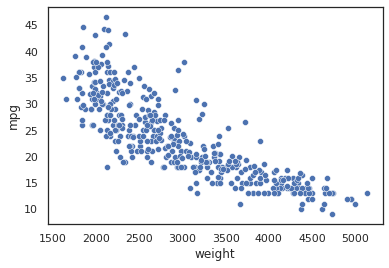

In [22]:
# Tomamos las caracteristicas
X = mpg['weight']
# El que debemos predecir, es decir mpg
y = mpg['mpg']
sns.scatterplot(X,y)

2) (1 punto) Investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos 

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

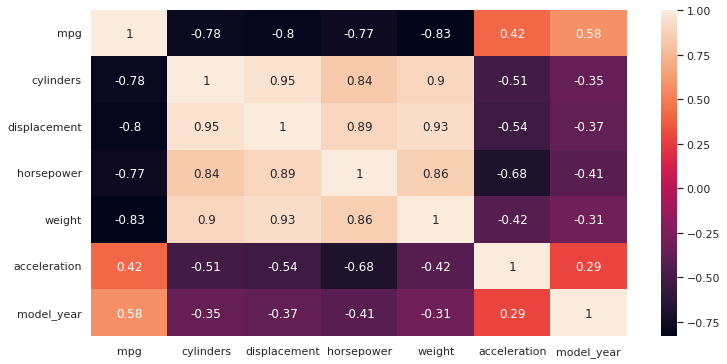

In [21]:
# Heatmap para identificar como se relacionan las variables
plt.figure(figsize = (12,6))
sns.heatmap(mpg.corr(),annot = True)

3) (1 punto) Construir y entrenar un modelo de regresion lineal


In [74]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor



# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

# Llenamos los valores vacios

mpg['horsepower']=mpg['horsepower'].fillna(np.mean(mpg['horsepower']))

# Tomamos las caracteristicas
X = mpg.drop('mpg',axis=1)
# El que debemos predecir, es decir mpg
y = mpg['mpg'].values
# Quitamos el origen y el nombre
X = X.drop('origin', axis=1)
X = X.drop('name', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)





In [75]:
# Creamos el modelo
model = LinearRegression()
model.fit(X_train ,y_train)


LinearRegression()

4) (1 punto) Mostrar estadistiscas de desempeño del modelo (investigar)

In [ ]:
pred = model.predict(X_test)
pred


In [80]:
tabla = pd.DataFrame({'Real':y_test.reshape(-1), 'Predecido':pred.reshape(-1)})
tabla

,Real,Predecido
0,18.0,22.391613
1,28.1,26.016488
2,19.4,20.000960
3,20.3,25.808593
4,20.2,24.301999
...,...,...
75,28.0,27.316087
76,36.4,26.961162
77,15.5,16.428691
78,14.0,11.414941


5) (1 punto) Mostrar [graficamente la lineas rectas](https://seaborn.pydata.org/tutorial/regression.html) en un grafico de dispersión para el par de variables que presentan la mayor correlacion. esta informacion la obtiene del correlation plot. realizar un grafico de dispersion con las variables mas correlacionadas.


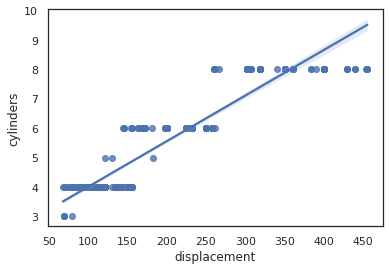

In [85]:
# Grafico de dispersión, siendo las que tienen mayor correlasion cylinders y displacement con 0.95
mpg = sns.load_dataset("mpg")
sns.regplot(x="displacement", y="cylinders", data=mpg);


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


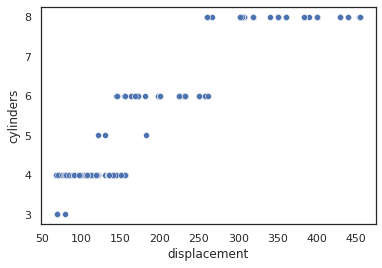

In [84]:
# Grafico de dispersion para cylinders y displacement
# Tomamos las caracteristicas
y = mpg['cylinders']
# El que debemos predecir, es decir mpg
X = mpg['displacement']
sns.scatterplot(X,y)

6) (1 punto) [Guardar el Jupyter notebook resultante en su cuenta propia de Github ](https://bebi103a.github.io/lessons/02/git_with_colab.html) y compartir el enlace en la pagina de la tarea en Educandus.

Referencias

https://pub.towardsai.net/linear-regression-analysis-on-the-auto-dataset-3464654abde8

https://www.youtube.com/watch?v=GfjlF4dEkQE